# Devoir d'évaluation - Régression linéaire

Intitulé :


In [1]:
# Pour manipuler et analyser des données sous formes de tableaux
import pandas as pd

In [2]:
# On stocke l'URL des données (voir consignes du TP) dans une variable
url = "https://tinyurl.com/y4pflefj"
# On lit les données avec la méthode read_csv de pandas
df = pd.read_csv(url)

In [3]:
# Première chose à faire : regarder le nombre de colonnes et leurs informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 27 columns):
time        8192 non-null object
lread       8192 non-null int64
lwrite      8192 non-null int64
scall       8192 non-null int64
sread       8192 non-null int64
swrite      8192 non-null int64
fork        8192 non-null float64
exec        8192 non-null float64
rchar       8192 non-null int64
wchar       8192 non-null int64
pgout       8192 non-null float64
ppgout      8192 non-null float64
pgfree      8192 non-null float64
pgscan      8192 non-null float64
atch        8192 non-null float64
pgin        8192 non-null float64
ppgin       8192 non-null float64
pflt        8192 non-null float64
vflt        8192 non-null float64
runqsz      8192 non-null float64
runocc      8192 non-null int64
freemem     8192 non-null int64
freeswap    8192 non-null int64
usr         8192 non-null int64
sys         8192 non-null int64
wio         7898 non-null float64
idle        7898 non-null float64


In [10]:
# Et on affiche un exemple d'une dizaine de lignes, tirées aléatoirement dans le jeu de données, pour voir son contenu
df.sample(10)

,time,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,...,pflt,vflt,runqsz,runocc,freemem,freeswap,usr,sys,wio,idle
7246,00:44:46,0,0,507,20,24,0.2,0.2,789,6978,...,15.60,16.80,1.0,100,7014,1861808,98,2,0.0,0.0
4324,14:11:31,4,2,3107,270,198,1.6,1.8,49962,60719,...,91.40,220.60,5.0,100,156,1020181,88,12,0.0,0.0
4305,11:27:32,5,2,2929,387,204,2.6,2.6,288065,215294,...,142.00,249.20,2.0,40,315,1130874,81,18,0.0,1.0
142,01:17:36,15,21,186,11,23,0.2,0.2,2058,12778,...,15.40,17.20,1.0,100,7138,1873512,96,4,0.0,0.0
4546,16:25:20,2,0,1200,134,128,0.6,0.6,208393,90332,...,29.94,131.54,126.0,954400,90,10,0,0,NaN,NaN
5618,22:54:59,5,0,1776,106,29,4.4,17.8,200983,13030,...,221.80,333.20,1.8,100,5306,1832483,88,12,0.0,0.0
7280,16:41:55,3,0,943,119,116,0.8,0.6,34217,32924,...,58.40,130.00,531.0,943466,93,7,0,0,NaN,NaN
752,17:06:12,4,2,2821,171,126,0.4,0.6,25208,41575,...,28.14,69.06,3.4,100,2859,1529525,94,6,0.0,0.0
8126,01:05:41,0,0,161,10,27,0.2,0.2,425,23258,...,15.60,16.80,1.0,100,6236,1856808,99,1,0.0,0.0
2918,15:07:54,7,1,2544,135,126,1.2,2.4,69693,23159,...,87.00,143.00,4.0,100,2892,1375262,91,9,0.0,0.0


In [6]:
# Pour tracer et manipuler des graphiques basiques
import matplotlib.pyplot as plt

[(0, 1)]

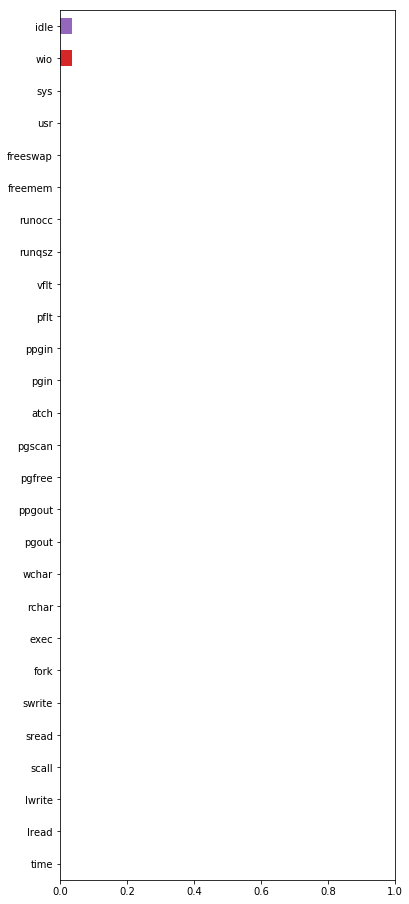

In [7]:
# On va faire une exploration des données pour voir quel pourcentage de valeurs vides il y a par colonne
# Pour cela on utilise la méthode de la variable temporaire du TP de ce matin
_, ax = plt.subplots(figsize=(6, 16))

# On fait un graphe
df.isnull().mean().plot.barh(ax=ax)
ax.set(xlim=(0, 1))

On constate que seules deux colonnes (idle et wio) contiennent des valeurs nulles. De plus, les valeurs nulles sont peu nombreuses par rapport au nombre total d'entrées de la colonne.

In [8]:
# Grâce à sum().sum() on va compte toutes les cellules nulles du DataFrame
df.isnull().sum().sum()

588

In [9]:
# On a 588 cellules vides. Pour nuancer ce chiffre, voyons voir combien d'entrées le tableau contient avec un len()
len(df)

8192

Je sais grâce à df.info() qu'on a 27 colonnes. Donc à raison de 8192 entrées, ça fait un total de 221184 cellules au total.
588 représente donc ~0.26% des cellules qui sont vides. Comme c'est extrêmement peu, je vais tenter de savoir où ces cellules vides se trouvent plus précisément.

In [14]:
df['idle'].isnull().sum()

294

In [15]:
df['wio'].isnull().sum()

294

On a donc 294 cellules vides dans la colonne IDLE et 294 dans la colonne WIO. Le compte y est car 294 * 2 = 588.

In [16]:
# On remplace les valeurs vides par des 0.0 en partant du principe que c'est cohérent avec ce qu'on souhaite
df.loc[:, ['idle', 'wio']] = df.loc[:, ['idle', 'wio']].fillna(0.0)

In [17]:
# Afin de vérifier si on a bien retiré toutes les valeurs nulles, on refait une somme
df.isnull().sum().sum()

0

In [18]:
# Pour tracer et manipuler des graphiques avancés basés sur matplotlib
import seaborn as sns

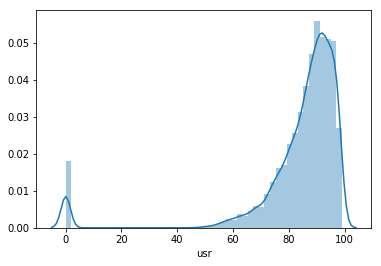

In [20]:
# Par curiosité, je jette un oeil à la courbe de USR, la valeur que l'on va chercher à deviner
sns.distplot(df['usr'])

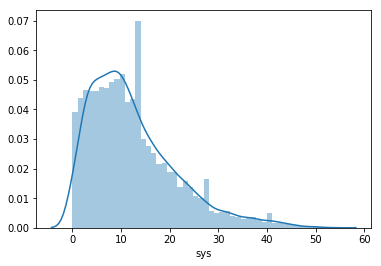

In [98]:
# Et toujours par curiosité, la colonne SYS, parce qu'il est précisé dans les consignes que se baser dessus est trop facile
sns.distplot(df['sys'])

Du coup, plutôt que de scruter chaque courbe manuellement, autant regarder quelle relation chaque colonne peut avoir avec la colonne USR, puisque c'est celle qu'on tente de prévoir. Pour cela, une boucle for.

Comparaison entre lread et usr


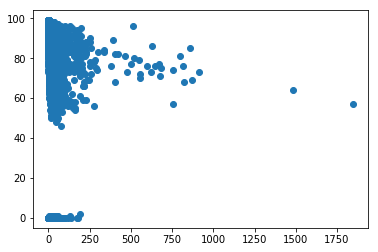

Comparaison entre lwrite et usr


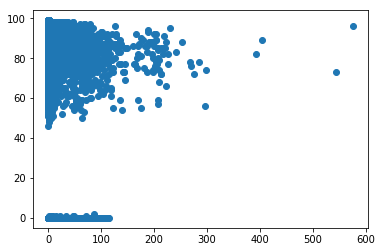

Comparaison entre scall et usr


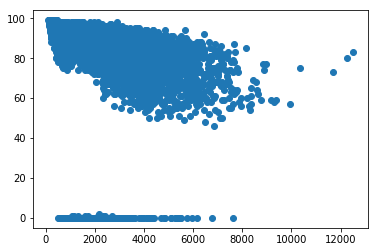

Comparaison entre sread et usr


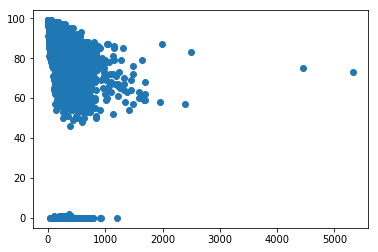

Comparaison entre swrite et usr


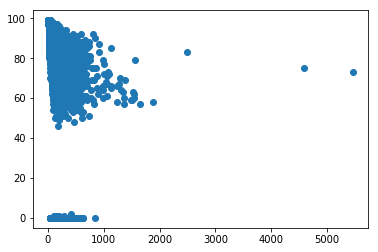

Comparaison entre fork et usr


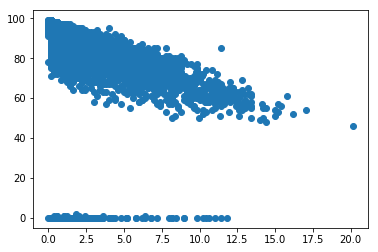

Comparaison entre exec et usr


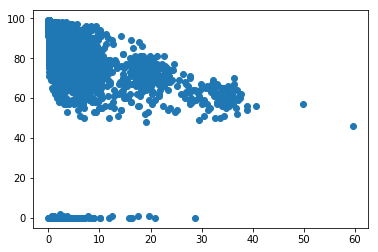

Comparaison entre rchar et usr


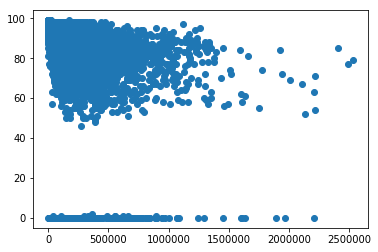

Comparaison entre wchar et usr


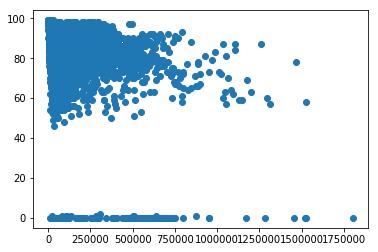

Comparaison entre pgout et usr


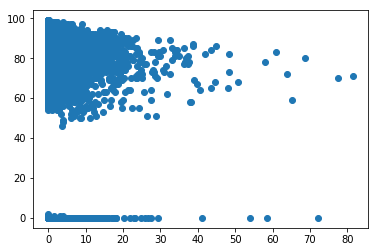

Comparaison entre ppgout et usr


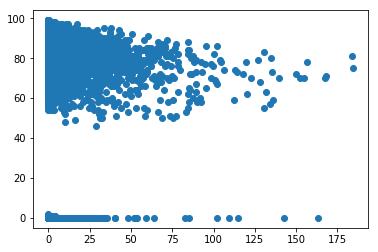

Comparaison entre pgfree et usr


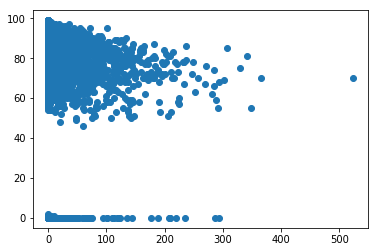

Comparaison entre pgscan et usr


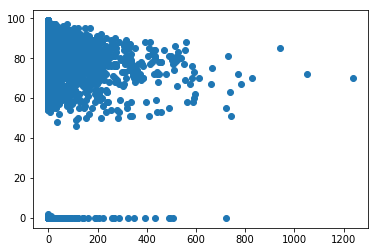

Comparaison entre atch et usr


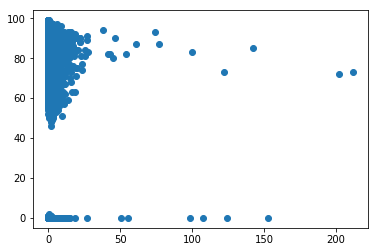

Comparaison entre pgin et usr


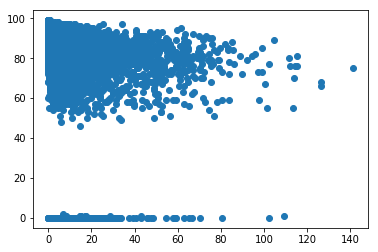

Comparaison entre ppgin et usr


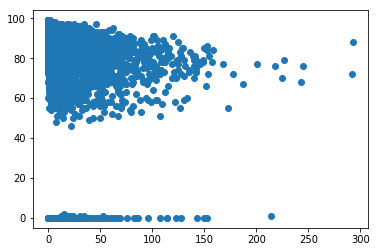

Comparaison entre pflt et usr


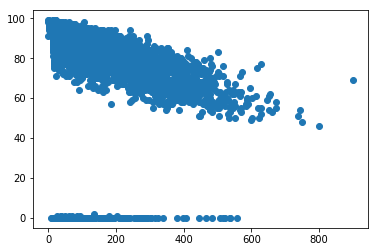

Comparaison entre vflt et usr


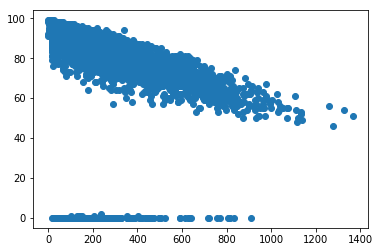

Comparaison entre runqsz et usr


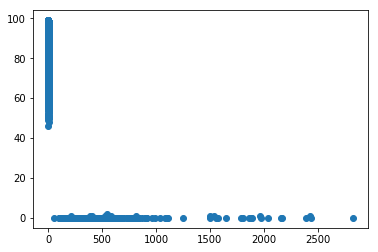

Comparaison entre runocc et usr


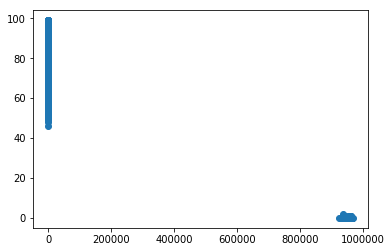

Comparaison entre freemem et usr


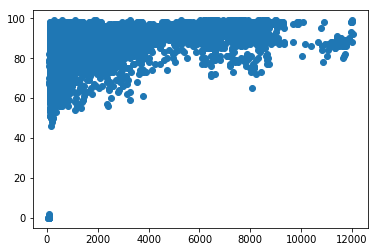

Comparaison entre freeswap et usr


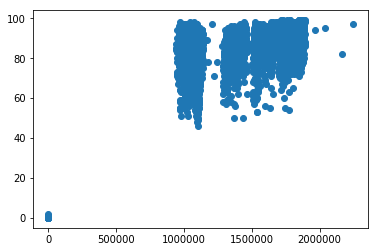

In [46]:
for col in df.columns:
    if col in ['usr', 'sys', 'wio', 'idle', 'time']:
        continue
    plt.scatter(df[col], df['usr'])
    print(f"Comparaison entre {col} et usr")
    plt.show()

On obtient de jolis graphes.  
Certains semblent former des amas similaires à ceux étudiés ce matin. Du coup, on va aller un peu plus loin et tenter de tracer des régressions linéaires pour chaque graphe.

In [56]:
# On importe la lib de régression linéaire de SciKit
from sklearn.linear_model import LinearRegression

# La segmentation du jeu de données en entrainement/test
from sklearn.model_selection import train_test_split

# Le calcul du r2_score
from sklearn.metrics import r2_score

# Et numpy, pour manipuler des matrices ou tableaux multidimensionnels
import numpy as np

In [59]:
# On crée une fonction (très mal) nommée eval. Elle va servir à tracer plusieurs graphes avec la régression visible
def eval(col):
    X = df[[col]]
    y = df['usr']

    # On subdivise le jeu de données global en jeu d'entrainement et de test. A hauteur de 30% pour le jeu de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    # On instancie notre algo de régression linéaire
    reg = LinearRegression()

    # Apprentissage
    reg.fit(X_train, y_train)
    # Prédiction
    y_pred = reg.predict(X_test)
    
    # On précise quelle colonne est mise en relation avec USR
    print(f"Comparaison entre {col} et usr")
    
    # On calcule le R2_score, normalement compris en 0 et 1 et qui doit tendre vers 1 idéalement
    r = r2_score(y_test, y_pred)
    print(f"R2_score {r}")

    # On trace un diagramme de scatterplot avec la droite de régression linéaire en rouge
    plt.scatter(X_test, y_test)
    plt.scatter(X_test, y_pred, color = 'red')
    plt.show()

Comparaison entre lread et usr
R2_score 0.022307820827297653


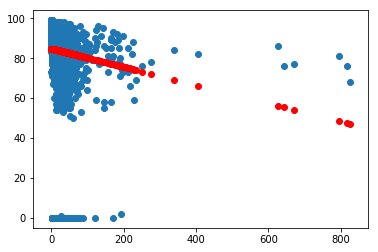

Comparaison entre lwrite et usr
R2_score 0.013288561274313326


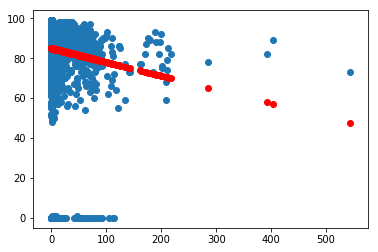

Comparaison entre scall et usr
R2_score 0.09986796121640162


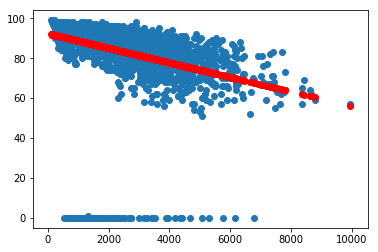

Comparaison entre sread et usr
R2_score 0.09501325181136111


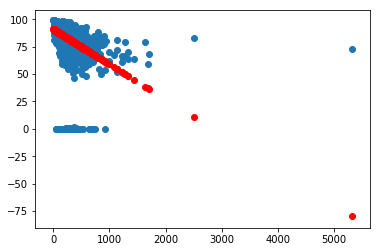

Comparaison entre swrite et usr
R2_score 0.0018507149700472958


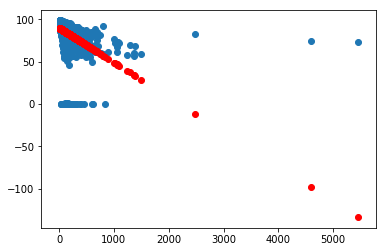

Comparaison entre fork et usr
R2_score 0.1498448780734185


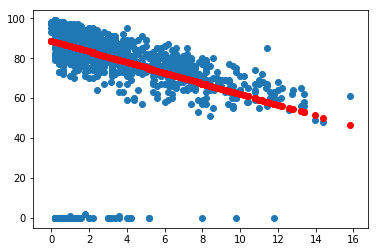

Comparaison entre exec et usr
R2_score 0.07780687370490136


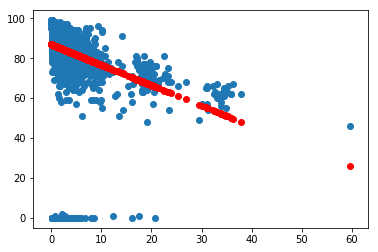

Comparaison entre rchar et usr
R2_score 0.11509543681303969


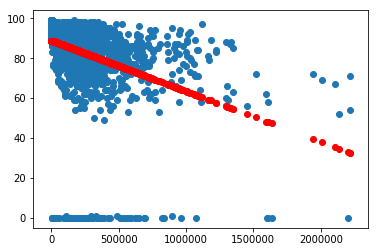

Comparaison entre wchar et usr
R2_score 0.09110822831001464


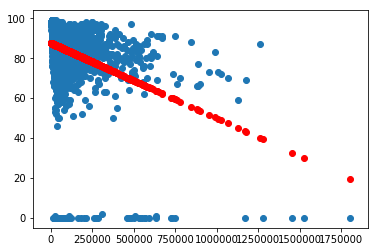

Comparaison entre pgout et usr
R2_score 0.04824192098263003


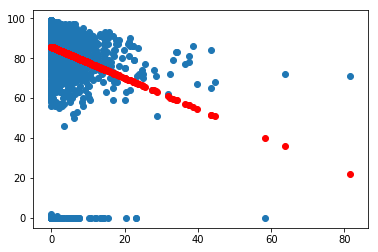

Comparaison entre ppgout et usr
R2_score 0.051523330706681136


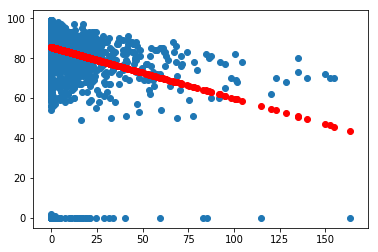

Comparaison entre pgfree et usr
R2_score 0.054851436023216626


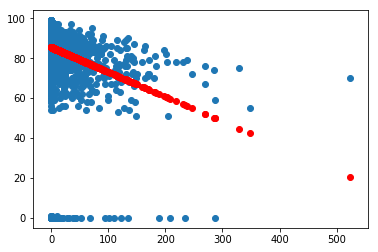

Comparaison entre pgscan et usr
R2_score 0.03390852411304468


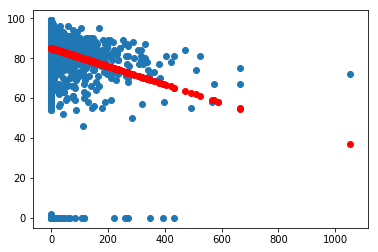

Comparaison entre atch et usr
R2_score 0.02630742132785613


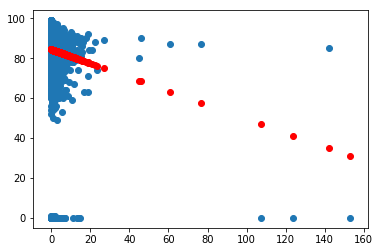

Comparaison entre pgin et usr
R2_score 0.06009550213138248


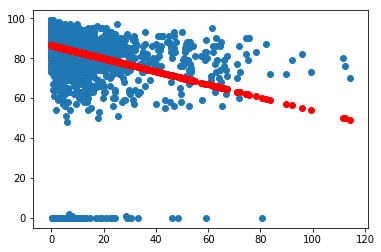

Comparaison entre ppgin et usr
R2_score 0.05081519838372317


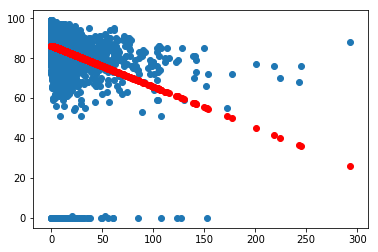

Comparaison entre pflt et usr
R2_score 0.16818953388023494


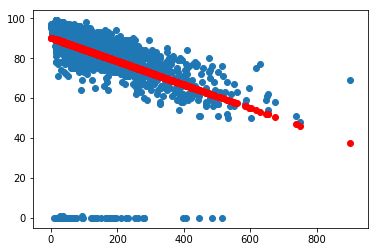

Comparaison entre vflt et usr
R2_score 0.1719869296641593


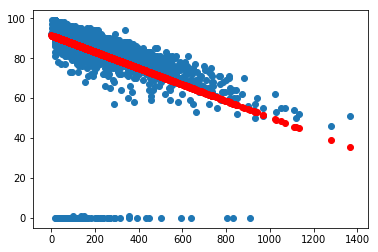

Comparaison entre runqsz et usr
R2_score 0.4096197176027866


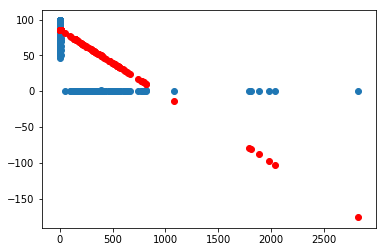

Comparaison entre runocc et usr
R2_score 0.7858726912579596


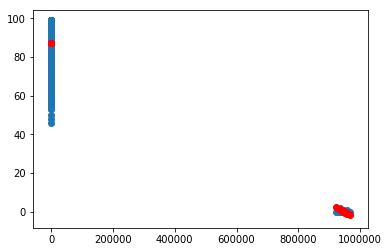

Comparaison entre freemem et usr
R2_score 0.06656528630484693


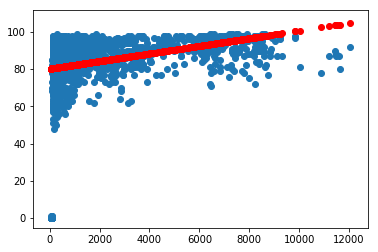

Comparaison entre freeswap et usr
R2_score 0.45190185722456955


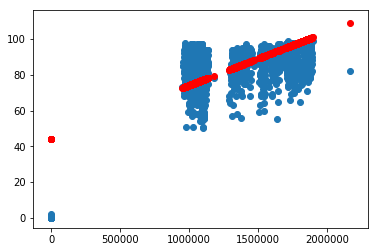

In [60]:
# Pour chaque colonne à l'exception de USR (qu'on cherche), et de SYS, WIO, IDLE, TIME
for col in df.columns:
    if col in ['usr', 'sys', 'wio', 'idle', 'time']:
        continue
    # On appelle la fonction éval pour faire le fit/predict/r2/graphe
    eval(col)

Les droites des diagrammes SCALL, FORK, PFLT, VFLT semblent pas mal du tout. Elles sont bien en centre du nuage de point formé, par conséquent j'aurais tendance à dire que la distance de chaque point (à l'exception de quelques points sur la ligne 0) par rapport à la droite de régression est plutôt bonne.

In [96]:
# Et donc, c'est parti pour les tests d'algo de régression.
# On en importe tout un tas
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
# J'importe aussi time pour évaluer le temps d'execution de chaque algo (et comparer les performances de chacun)
import time

In [86]:
# On crée score_func, une fonction d'évaluation de la pertinence de l'algo
def score_func(X, y, reg, nb_splits = 10):
    # On crée un array de score qui va recueillir les résultats
    scores = []
    # A chaque fois, on va utiliser train_test_split pour varier les données exploitées
    for i in range(nb_splits):
        # On recrée un jeu de données d'entrainement/test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
        # Apprentissage
        reg.fit(X_train, y_train)
        # Prédiction
        y_pred = reg.predict(X_test)
        y_pred = np.maximum(y_pred, 0)
        # On ajoute le score R2 de la prédiction à l'array des scores
        scores.append(r2_score(y_test, y_pred))
    return scores

In [87]:
# 
def score_stats(X, y, reg, nb_splits = 10):
    tt = time.time()
    scores = score_func(X, y, reg, nb_splits)
    duration = (time.time() - tt) / nb_splits
    # Affiche l'écart type (moyenne par rapport à la précision)
    print(
        f"{np.mean(scores):.2f} +/- {2 * np.std(scores):.2f}"
        f" (cpu_time: {duration:.3f} sec.)"
    )

In [88]:
for name, reg in [
    ('linear', LinearRegression()),
    ('svm', SVR(gamma = 'auto')),
    ('KNN', KNeighborsRegressor()),
    ('ada', AdaBoostRegressor()),
    ('extra', ExtraTreesRegressor(n_estimators = 10)),
    ('rf', RandomForestRegressor(n_estimators = 10)),
    ('rf+', RandomForestRegressor(n_estimators = 100)),
    ('dummy', DummyRegressor())
]:
    print(name)
    score_stats(df.drop(columns=['usr', 'sys', 'wio', 'idle', 'time']), df['usr'], reg, nb_splits = 10)

linear
0.98 +/- 0.00 (cpu_time: 0.008 sec.)
svm
-0.07 +/- 0.01 (cpu_time: 3.682 sec.)
KNN
0.87 +/- 0.02 (cpu_time: 0.041 sec.)
ada
0.94 +/- 0.01 (cpu_time: 0.747 sec.)
extra
0.98 +/- 0.00 (cpu_time: 0.226 sec.)
rf
0.98 +/- 0.00 (cpu_time: 0.504 sec.)
rf+
0.98 +/- 0.00 (cpu_time: 5.104 sec.)
dummy
-0.00 +/- 0.00 (cpu_time: 0.003 sec.)


In [89]:
for name, reg in [
    ('linear', LinearRegression()),
    ('svm', SVR(gamma = 'auto')),
    ('KNN', KNeighborsRegressor()),
    ('ada', AdaBoostRegressor()),
    ('extra', ExtraTreesRegressor(n_estimators = 10)),
    ('rf', RandomForestRegressor(n_estimators = 10)),
    ('rf+', RandomForestRegressor(n_estimators = 100)),
    ('dummy', DummyRegressor(strategy='mean'))
]:
    print(name)
    score_stats(df[['fork']], df['usr'], reg, nb_splits = 10)

linear
0.14 +/- 0.04 (cpu_time: 0.005 sec.)
svm
0.10 +/- 0.03 (cpu_time: 1.396 sec.)
KNN
0.00 +/- 0.13 (cpu_time: 0.021 sec.)
ada
0.13 +/- 0.03 (cpu_time: 0.013 sec.)
extra
0.13 +/- 0.04 (cpu_time: 0.017 sec.)
rf
0.13 +/- 0.02 (cpu_time: 0.017 sec.)
rf+
0.11 +/- 0.02 (cpu_time: 0.149 sec.)
dummy
-0.00 +/- 0.00 (cpu_time: 0.002 sec.)


In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [94]:
import warnings
warnings.filterwarnings("ignore")

In [97]:
# print(df['time'].split(':').astype('float'))
for name, reg in [
    ('linear', LinearRegression()),
    ('svm', SVR(gamma = 'auto')),
    ('KNN', KNeighborsRegressor()),
    ('ada', AdaBoostRegressor()),
    ('extra', ExtraTreesRegressor(n_estimators = 10)),
    ('rf', RandomForestRegressor(n_estimators = 10)),
    ('rf+', RandomForestRegressor(n_estimators = 100)),
    ('sgd', SGDRegressor()),
    ('dummy', DummyRegressor(strategy='mean'))
]:
    print(name)
    pipe = Pipeline(
        steps=[
            ('scaling', StandardScaler(with_mean=False)),
            ('reg', reg)
        ]
    )
    score_stats(df.drop(columns=['usr', 'sys', 'wio', 'idle', 'time']), df['usr'], pipe, nb_splits = 10)

linear
0.98 +/- 0.00 (cpu_time: 0.012 sec.)
svm
0.82 +/- 0.04 (cpu_time: 2.064 sec.)
KNN
0.97 +/- 0.01 (cpu_time: 0.398 sec.)
ada
0.94 +/- 0.01 (cpu_time: 0.733 sec.)
extra
0.98 +/- 0.00 (cpu_time: 0.228 sec.)
rf
0.98 +/- 0.00 (cpu_time: 0.503 sec.)
rf+
0.98 +/- 0.00 (cpu_time: 5.070 sec.)
sgd
0.81 +/- 0.02 (cpu_time: 0.014 sec.)
dummy
-0.00 +/- 0.00 (cpu_time: 0.010 sec.)
